# Grad stats 2 problem set 1

## 1. Set your current directory and download Charlie's dataset or your own data set using the "copy" command followed by "import delimited" or "use" depending on the format of your data [5 points]

In [203]:
clear all 
copy "https://raw.githubusercontent.com/charlieeatonphd/agilepredators/master/agilepredatorsdata20191116.csv" agilepredatorsdata20191116.csv
import delimited using "agilepredatorsdata20191116.csv", clear





(52 vars, 205,262 obs)


## 2. list all of the variable names in the dataset using the "ds" command with the appropriate varwidth specification [1 point]

In [204]:
ds, varwidth(29)

unitid                    idx_gr                    online                    chain                     grad_rate_150_p_w         pctchrtgrbkaat_w          pct4yrchrtgrbkaat_w       poacqu                    peswitcherall
year                      selective                 total_enrollment          investevent               grad_rate_150_p2yr_w      pctchrtgrwhitt_w          pct4yrchrtgrhispt_w       dist_pell_s               peswitchsystemall
iclevel                   systemid                  grtotltchrt4yr            pe_ind                    grad_rate_150_p4yr_w      pctchrtgrhispt_w          pct4yrchrtgrwhitt_w       dist_black_share_w        poswitcherall
idx_ef                    systemnm                  grtotltchrt2yr            po_ind                    all_under_w               pct2yrchrtgrbkaat_w       state_n                   dist_white_share_w        poswitchsystemall
idx_f                     ipo                       grtotltallgradchrt        inst_name_new             

## 3. Use the help magic to print the help documenation for the **"sum"** command. If you need information on the help magic, see here: https://nbviewer.jupyter.org/github/kylebarron/stata_kernel/blob/master/examples/Example.ipynb [1 pt]

In [194]:
%help summarize






This front-end cannot display HTML help.

## 4. Use the **"drop"** command with an **if statement** to drop schools if they are **state**, **community**, or **non-proft** in the **owner_pe** variable. Use the "keep" command and an if statement to only keep observations if the year is 2014, then use the summarize command with the **"detail"** specification to summarize the variable **"dist_pell_s"**. This variable measures a school's Pell Grant revenue per student. If you are working with your own data, use the **drop, keep, and summarize** commands to narrow your dataset in some systematic way and summarize an **interval ratio** variable. [5 pts]
[Explain narrowing choices for your own dataset here, or interpret the meaning of the for-profit college narrowing here] In order to narrow our choices down to only for-profit colleges we had to remove the state colleges, community colleges, and non-profit colleges. By removing these kind of schools we left with the different kinds of for-profit schools. 

In [205]:
codebook owner_pe
drop if owner_pe=="State"
drop if owner_pe=="Community"
drop if owner_pe=="Non-profit"
tab year, nol m
keep if year==2014
sum dist_pell_s, detail
codebook dist_pell_s









---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
owner_pe                                                                                                                                                                                                                                            (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  string (str15)

         unique values:  6                        missing "":  0/205,262

            tabulation:  Freq.  Value
                        41,264  "Community"
                        66,188  

## 5. Create 1) a histogram and 2) a boxplot to visualize the distribution of Pell Grant revenue (or an interval ratio variable from your own dataset) in the following code cell. Then interpret the distributions in this markdown cell [3 pts]
[YOUR INTERPRETATION HERE] The histogram is skewed right and has a large outlier, unimodal becaue it only has one mode. The boxplot show the minimum, median, and maximum of the distribution. 


(bin=35, start=0, width=511.46116)


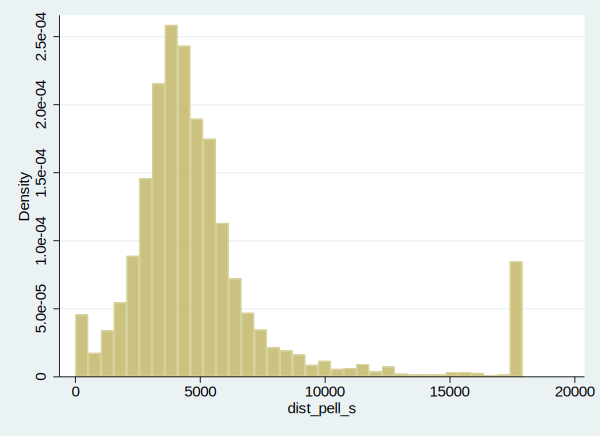

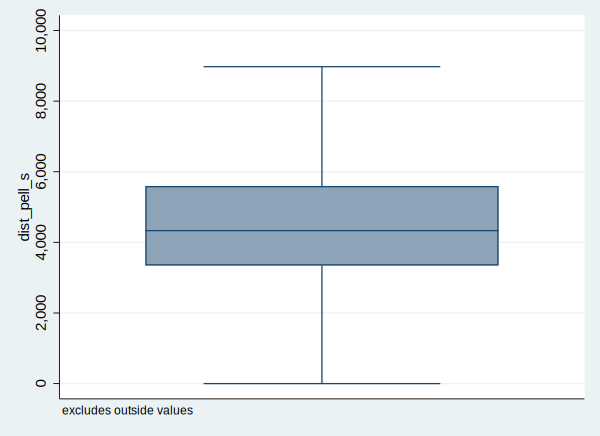

In [206]:
hist dist_pell_s
graph box dist_pell_s, nooutsides





## 6. Students at for-profit colleges have especially poor graduation rates at 4-year degree schools. In Eaton(2020) and Eaton, Howell, & Yannelis (2019), I've argued argued that for-profit colleges are more predatory under publicly traded and private equity ownership. Based on this theory, write a hypothesis about the relationship between whether a school offers 4-year or lower degrees and for-profit college ownership. Explain what is the independent variable and dependent variable and why? If you are working with your own data, do the same for a relationship between two **nominal** variables in your data. [4 pts]
1. My hypothesis is that for-profit schools are not concened with making sure that students are graduating.They dont have as many supportive programs to make sure students are sucessul. They make more money if students are taking clases over again they don't necessarily make a profit from students actually graduating. 
2. [YOUR EXPLANATION OF INDEPENDENT AND DEPENDENT VARIABLES HERE] The dependent variable is 4-year or lower degree. The independent variable is for-profit college ownership. 

## 7. Create a frequency table for colleges by their **level of degree offerings (iclevel)** and **ownership form (owner_pe)**. Make sure the dependent variable is listed first, making its values the row values. Stata doesn't like string variables, so use the commande **encode** with the **gen** specification to create encoded **iclevel2** and **owner_pe2** variables to use. If you are working with your own data, do the same for the two variables you hypothesized about. [3 pts]

In [207]:
des iclevel owner_pe
tab iclevel
tab owner_pe





              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
iclevel         str35   %35s                  
owner_pe        str15   %15s                  


                            iclevel |      Freq.     Percent        Cum.
------------------------------------+-----------------------------------
   At least 2 but less than 4 years |      1,060       29.11       29.11
                 Four or more years |        790       21.70       50.81
Less than 2 years (below associate) |      1,791       49.19      100.00
------------------------------------+-----------------------------------
                              Total |      3,641      100.00


       owner_pe |      Freq.     Percent   

In [208]:
encode iclevel, gen(iclevel2)
encode owner_pe, gen(owner_pe2)
des iclevel2 owner_pe2

tab iclevel2 owner_pe2

xi i.iclevel2, noomit










              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
iclevel2        long    %35.0g     iclevel2   
owner_pe2       long    %15.0g     owner_pe2
                                              


                      |            owner_pe2
             iclevel2 | Private e  Privately  Publicly  |     Total
----------------------+---------------------------------+----------
At least 2 but less t |       216        612        232 |     1,060 
   Four or more years |       104        191        495 |       790 
Less than 2 years (be |       232      1,364        195 |     1,791 
----------------------+---------------------------------+----------
                Total |       552      2,

## 7. Create a horizontal bar graph using the **graph hbar** command with the **over** specification to plot the percentage of schools with degree levels within each ownership form. Use the **xi** command with the **noomit** option to create a dummy variable for iclevel. Do the same with your variables of interest if you are using your own data. [3 pts]

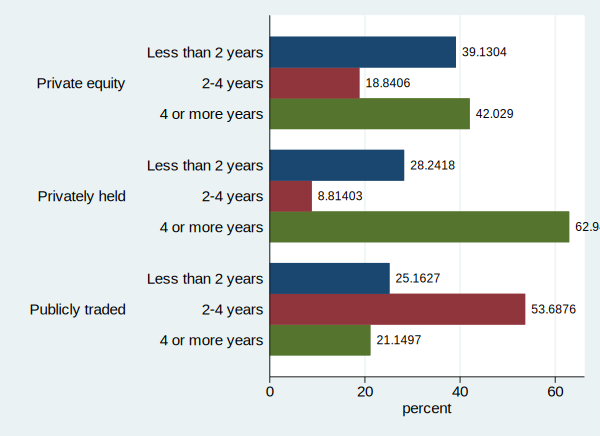

In [209]:
graph hbar _Iiclevel2_* , over(owner_pe2) label percentages legend(off) blabel(bar) showyvars yvaroptions(relabel(1 "Less than 2 years" 2 "2-4 years" 3 "4 or more years"))



## 8. Provide your interpretation of the results from the bivariate frequency table and the bar graph. Is there a relationship between ownership form and offering higher degrees? Or in your own variables if using your own data? What is the relationship in your own words, and does it fit your hypothesis?
[YOUR INTERPRETATION HERE] The schools that are publicly traded are less likely to offer higher degrees. These are the schools that focus on trade and certificate degrees. The private equity and privately held schools are more likely to offer the higher degrees. 

## 9. Private equity and publicly traded ownership may lead to more predation. But privately held colleges can be predatory too. Within each ownership form, those colleges that are operated by chains may also be more likely to be predatory. Use the **chain** variable to generate another set of bivariate tables and bargraphs for **degree level (iclevel)** and **chain ownership** and for **chain ownership (chain)** and **ownership form (owner_pe)**. Do the same if you think there is another intervening variable in your own data. Then report your interpretation [5 pts]
[YOUR INTERPRETATION HERE]

Privately held schools were more likely to be operated by chains. Although privately held colleges don't seem to be as predatory as private equity and publically trades schools, being operated by chains makes them predatory as well.  



      chain |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,754       48.17       48.17
          1 |      1,887       51.83      100.00
------------+-----------------------------------
      Total |      3,641      100.00




             chain |      Freq.     Percent        Cum.
-------------------+-----------------------------------
         No chains |      1,754       48.17       48.17
Operated by chains |      1,887       51.83      100.00
-------------------+-----------------------------------
             Total |      3,641      100.00


                      |         chain
             iclevel2 | No chains  Operated  |     Total
----------------------+----------------------+----------
At least 2 but less t |       455        605 |     1,060 
   Four or more years |       147        643 |       790 
Less than 2 years (be |     1,152        639 |     1,791 
----------------------+----------------------+----------
   

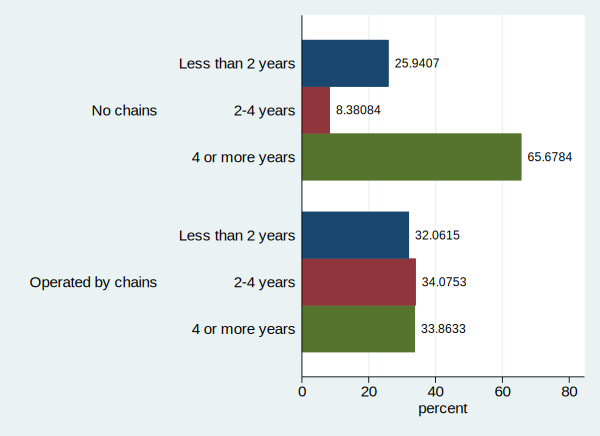






                   |            owner_pe2
             chain | Private e  Privately  Publicly  |     Total
-------------------+---------------------------------+----------
         No chains |        29      1,721          4 |     1,754 
Operated by chains |       523        446        918 |     1,887 
-------------------+---------------------------------+----------
             Total |       552      2,167        922 |     3,641 


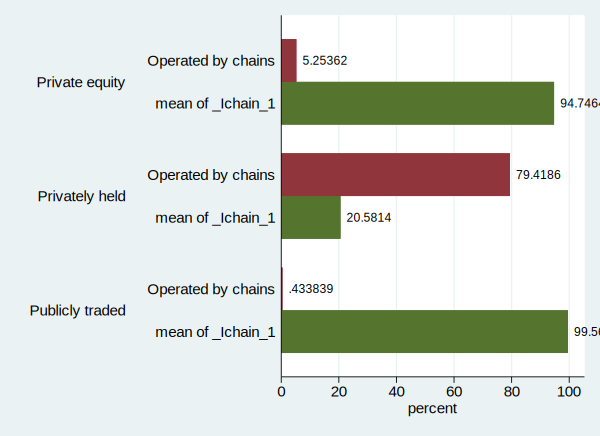

In [210]:
tab chain, nol m
label define chain 0 "No chains" 1 "Operated by chains"
label values chain chain
tab chain

tab iclevel2 chain

graph hbar _Iiclevel2_*, over(chain) label percentages legend(off) blabel(bar) showyvars yvaroptions(relabel(1 "Less than 2 years" 2 "2-4 years" 3 "4 or more years"))

tab chain owner_pe2


xi i.chain, noomit

graph hbar _Ichain_*, over(owner_pe2) label percentages legend(off) blabel(bar) showyvars yvaroptions(relabel(0 "No chains" 1 "Operated by chains"))








## 10. Lastly, use **chain ownership** or the relevant variable for your own data as a control variable by 1) adding the specification "bysort iclevel:" before the "tab command" and 2) adding a "by(iclevel)" specification to the end of the graph command. Interpret the results [5 pts]
[YOUR INTERPRETATION HERE]Colleges that offer 2-4 year degress are operated by chains. Colleges that offer less than a 2 year degress are not opreated by chains. 



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> chain = No chains

                      |            owner_pe2
              iclevel | Private e  Privately  Publicly  |     Total
----------------------+---------------------------------+----------
At least 2 but less.. |        11        444          0 |       455 
   Four or more years |        14        129          4 |       147 
Less than 2 years (.. |         4      1,148          0 |     1,152 
----------------------+---------------------------------+----------
                Total |        29      1,721          4 |     1,754 

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

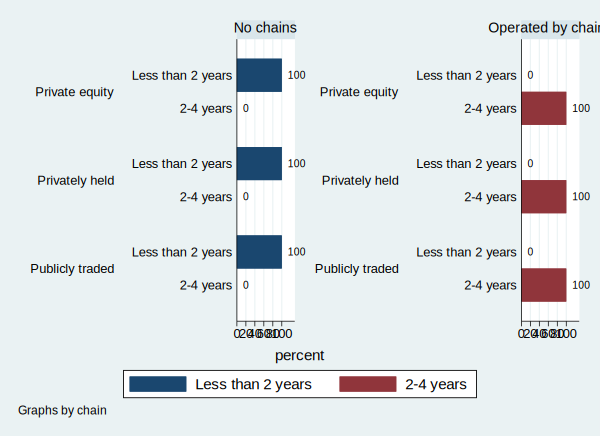

In [212]:
bysort chain: tab iclevel owner_pe2
bysort chain: tab iclevel2 owner_pe2, 


graph hbar _Ichain_*, over(owner_pe2) label percentages legend(off) blabel(bar) showyvars yvaroptions(relabel(1 "Less than 2 years" 2 "2-4 years" 3 "4 or more years")) by(chain)

